In [24]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
trns_train = pd.read_csv('ieee-fraud-detection/train_transaction.csv', engine = 'python')

In [2]:
trns_train.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
trns_train.shape

(590540, 394)

In [4]:
trns_train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [5]:
trns_train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [6]:
trns_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [7]:
trns_train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [8]:
# convert the datatype 'object' to 'category'
clst = list(trns_train.select_dtypes(include = 'object').columns)

for c in clst:
    trns_train[c] = trns_train[c].astype('category')

In [9]:
trns_train.select_dtypes(include = 'category')

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,W,visa,debit,gmail.com,NaN,T,T,T,M1,F,T,NaN,NaN,NaN
6,W,visa,debit,yahoo.com,NaN,T,T,T,M0,F,F,T,T,T
7,W,visa,debit,mail.com,NaN,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN
8,H,visa,debit,anonymous.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,W,mastercard,debit,yahoo.com,NaN,T,T,T,M0,T,T,NaN,NaN,NaN


In [10]:
trns_train.describe(include=['category'])

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,421180,244275,244288,244288
unique,5,4,4,59,60,2,2,2,3,2,2,2,2,2
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,227856,211374,155251,205656


In [11]:
trns_train.select_dtypes(exclude = 'category')[['isFraud', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']].corr()

,isFraud,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
isFraud,1.000000,0.030570,0.037229,-0.006833,0.030382,-0.030754,0.020909,0.028160,0.032139,-0.031703,0.028396,0.027484,0.031905,-0.011146,0.007921
C1,0.030570,1.000000,0.995089,-0.003467,0.967800,0.165862,0.982238,0.926258,0.967746,0.175999,0.958202,0.996515,0.927939,0.774603,0.951761
C2,0.037229,0.995089,1.000000,-0.003339,0.972134,0.126540,0.974845,0.938867,0.975863,0.133566,0.970624,0.993898,0.940258,0.751221,0.936148
C3,-0.006833,-0.003467,-0.003339,1.000000,-0.001720,-0.008101,-0.004711,-0.001730,-0.001203,-0.010074,-0.001494,-0.003583,-0.001763,-0.007747,-0.005091
C4,0.030382,0.967800,0.972134,-0.001720,1.000000,-0.012842,0.962319,0.895092,0.959995,-0.015970,0.952466,0.974547,0.894619,0.644549,0.907676
C5,-0.030754,0.165862,0.126540,-0.008101,-0.012842,1.000000,0.232409,-0.009970,-0.011654,0.925786,-0.011846,0.168862,-0.009875,0.717509,0.378950
C6,0.020909,0.982238,0.974845,-0.004711,0.962319,0.232409,1.000000,0.858583,0.921972,0.250695,0.914440,0.991105,0.858182,0.808531,0.984201
C7,0.028160,0.926258,0.938867,-0.001730,0.895092,-0.009970,0.858583,1.000000,0.982983,-0.012399,0.985062,0.915209,0.999489,0.632394,0.794701
C8,0.032139,0.967746,0.975863,-0.001203,0.959995,-0.011654,0.921972,0.982983,1.000000,-0.014492,0.996970,0.962722,0.983027,0.653245,0.860246
C9,-0.031703,0.175999,0.133566,-0.010074,-0.015970,0.925786,0.250695,-0.012399,-0.014492,1.000000,-0.014731,0.182446,-0.012212,0.704056,0.397396


In [12]:
trns_fraud = trns_train[trns_train.isFraud == 1]
trns_valid = trns_train[trns_train.isFraud == 0]
#trns_fraud[trns_fraud.card1 == 13413]
#trns_fraud.groupby(['card1', 'TransactionAmt']).head(50)

In [14]:
trns_fraud.TransactionAmt.describe()

count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

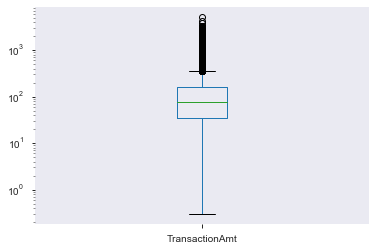

In [27]:
fig, ax = plt.subplots()
ax.set_yscale('log')
trns_fraud.boxplot(column = 'TransactionAmt', grid = False, ax = ax)

In [18]:
trns_valid.TransactionAmt.describe()

count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

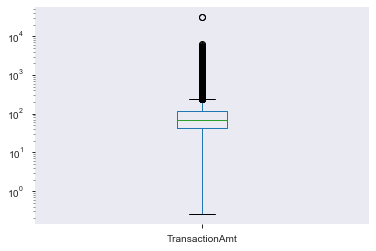

In [26]:
fig, ax = plt.subplots()
ax.set_yscale('log')
trns_valid.boxplot(column = 'TransactionAmt', grid = False, ax = ax)

In [28]:
trns_fraud.describe(include=['category'])

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,20663,20622,20624,17873,11227,6342,6342,6342,15436,7569,8692,4817,4817,4817
unique,5,4,2,42,32,1,2,2,3,2,2,2,2,2
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,T,F,F,F,T
freq,8969,13373,10674,9943,6811,6342,5158,4293,7198,4055,5397,4089,3373,3658


In [29]:
trns_valid.describe(include=['category'])

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,569877,568341,568345,478211,126064,313098,313098,313098,293660,232489,412488,239458,239471,239471
unique,5,4,4,59,60,2,2,2,3,2,2,2,2,2
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T
freq,430701,371394,429264,218412,50336,313073,280310,247438,189207,128977,222459,207285,151878,201998


In [34]:
trns_fraud.select_dtypes(exclude = 'category').drop('TransactionID', axis = 1).corr()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionDT,NaN,1.000000,0.039755,0.035200,-0.013747,0.014511,0.014398,0.077384,0.135555,-0.026821,...,0.034787,-0.014534,0.010519,-0.031806,-0.041794,0.032657,-0.036657,-0.023621,-0.014515,-0.034420
TransactionAmt,NaN,0.039755,1.000000,0.018249,0.076691,-0.306987,0.048047,-0.038431,0.082265,0.023474,...,-0.097557,0.129614,0.033666,0.063100,0.034564,-0.063769,-0.034298,0.063186,0.057591,0.042524
card1,NaN,0.035200,0.018249,1.000000,-0.000138,-0.060676,-0.057372,0.011375,0.026995,0.049152,...,-0.042445,-0.024851,-0.026933,-0.018651,-0.028400,-0.026358,-0.030413,-0.034822,-0.027412,-0.025374
card2,NaN,-0.013747,0.076691,-0.000138,1.000000,-0.115585,0.149751,0.114190,-0.028506,-0.059750,...,-0.040530,-0.018379,-0.028561,-0.021563,-0.034003,-0.058944,-0.046267,-0.010192,-0.004344,-0.008468
card3,NaN,0.014511,-0.306987,-0.060676,-0.115585,1.000000,-0.269582,-0.024789,-0.513432,-0.015791,...,0.023639,0.004534,0.005305,0.002613,0.004205,0.014586,0.005956,0.040081,0.024368,0.032142
card5,NaN,0.014398,0.048047,-0.057372,0.149751,-0.269582,1.000000,0.095865,0.062862,-0.021050,...,0.018034,-0.023954,-0.125546,-0.096996,-0.027750,-0.134821,-0.091598,0.041105,-0.023921,0.007785
addr1,NaN,0.077384,-0.038431,0.011375,0.114190,-0.024789,0.095865,1.000000,0.023200,-0.030226,...,0.025384,-0.008227,-0.040439,-0.025806,-0.064838,-0.128620,-0.119988,-0.005272,0.024976,0.014890
addr2,NaN,0.135555,0.082265,0.026995,-0.028506,-0.513432,0.062862,0.023200,1.000000,NaN,...,-0.032197,-0.005747,0.009036,0.002547,0.017435,0.020864,0.018954,-0.015355,-0.005084,-0.009134
dist1,NaN,-0.026821,0.023474,0.049152,-0.059750,-0.015791,-0.021050,-0.030226,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
trns_valid.select_dtypes(exclude = 'category').drop('TransactionID', axis = 1).corr()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionDT,NaN,1.000000,0.010833,0.009985,-0.019446,-0.015086,-0.025175,-0.001982,0.048875,-0.027445,...,0.266311,0.212309,0.233523,0.238528,0.006307,0.189524,0.109512,0.078399,0.216972,0.173100
TransactionAmt,NaN,0.010833,1.000000,-0.006384,0.013940,-0.102702,0.001684,-0.006782,0.027018,0.025232,...,0.007553,0.027501,0.013782,0.020631,0.081755,0.049508,0.075022,0.134861,0.087135,0.111650
card1,NaN,0.009985,-0.006384,1.000000,0.005196,0.008900,-0.095630,0.020641,-0.001571,0.004130,...,0.149905,0.124087,0.135715,0.139176,-0.001688,0.083488,0.052496,0.037119,0.121464,0.093366
card2,NaN,-0.019446,0.013940,0.005196,1.000000,0.031866,0.025774,0.028108,-0.021703,-0.012768,...,0.075925,0.057201,0.062591,0.064299,0.005226,0.046679,0.031564,0.018203,0.056848,0.044315
card3,NaN,-0.015086,-0.102702,0.008900,0.031866,1.000000,-0.148360,0.002413,-0.575083,-0.012453,...,0.001418,0.001101,0.001327,0.001270,-0.001052,-0.000439,-0.001806,0.000473,0.001493,0.001044
card5,NaN,-0.025175,0.001684,-0.095630,0.025774,-0.148360,1.000000,0.033366,0.034555,0.009245,...,-0.297286,-0.243569,-0.265774,-0.272866,-0.029051,-0.213125,-0.141833,-0.078873,-0.239490,-0.187854
addr1,NaN,-0.001982,-0.006782,0.020641,0.028108,0.002413,0.033366,1.000000,-0.003875,-0.000744,...,0.043461,0.036671,0.039921,0.040940,0.004907,0.033774,0.022236,0.011613,0.035512,0.027459
addr2,NaN,0.048875,0.027018,-0.001571,-0.021703,-0.575083,0.034555,-0.003875,1.000000,-0.039220,...,0.003390,0.003675,0.003921,0.004050,0.002182,0.005477,0.004158,0.001828,0.003895,0.003295
dist1,NaN,-0.027445,0.025232,0.004130,-0.012768,-0.012453,0.009245,-0.000744,-0.039220,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
